In [1]:
import numpy as np
import pandas as pd
import os
import datetime


import matplotlib.pyplot as plt
import seaborn as sns

We have a data for the 2019 year in the monthly  frequency which is total 12 files , lets see one file and then merge all in one single file for the analysis 

Also check the data format before merge all the files

In [2]:
month_1 = pd.read_csv('Sales_Analysis_2019/Sales_January_2019.csv')
month_1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


Lets merge all the .csv files inside the folder for 2019 year.

we can use the concat() function 

so first define a variable to address the folder location and then using for loop we can merge it

In [3]:
#using files variable we can declare a path for folder
files = [file for file in os.listdir('Sales_Analysis_2019')]

print('there are total number of files is =',len(files))

full_year_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('Sales_Analysis_2019/' + file)
    full_year_data = pd.concat([full_year_data, df])

full_year_data.to_csv('yearly_data.csv', index=False)

print('The data shape of final merged file is -',full_year_data.shape)

there are total number of files is = 12
The data shape of final merged file is - (186850, 6)


In [4]:
#The same job above used for merging we can do in a differnt way using Glob library 

import glob
files = glob.glob('Sales_Analysis_2019/*.csv')

print(len(files))

#now we can merge the files inside the folder

data = pd.concat([pd.read_csv(file) for file in files])

print('The data shape of final merged file is -',data.shape)

print(type(data))


12
The data shape of final merged file is - (186850, 6)
<class 'pandas.core.frame.DataFrame'>


In [5]:
yearly_data = pd.read_csv('yearly_data.csv')
yearly_data.sample(10)
#yearly_data.head() (Will do same work)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
30529,295787,USB-C Charging Cable,1,11.95,12/28/19 21:03,"458 Elm St, Atlanta, GA 30301"
74481,147829,Wired Headphones,1,11.99,01/10/19 15:38,"701 1st St, Los Angeles, CA 90001"
67120,161600,AA Batteries (4-pack),3,3.84,02/13/19 19:46,"704 Washington St, Los Angeles, CA 90001"
138893,280494,Wired Headphones,1,11.99,11/17/19 23:58,"491 Center St, Los Angeles, CA 90001"
114726,171047,Bose SoundSport Headphones,1,99.99,03/09/19 19:38,"764 4th St, Austin, TX 73301"
176835,249753,ThinkPad Laptop,1,999.99,09/26/19 09:29,"868 4th St, Los Angeles, CA 90001"
33180,298324,AA Batteries (4-pack),1,3.84,12/17/19 16:23,"955 Meadow St, Portland, ME 04101"
92461,210706,AA Batteries (4-pack),1,3.84,06/30/19 10:56,"408 Forest St, Los Angeles, CA 90001"
136644,209473,Apple Airpods Headphones,1,150,05/01/19 19:58,"756 8th St, Boston, MA 02215"
97663,215641,Wired Headphones,1,11.99,06/23/19 19:43,"659 Wilson St, Boston, MA 02215"


In [6]:
#null_df = yearly_data[yearly_data.isna().any(axis=1)]
#null_df = [i for i in yearly_data.columns if yearly_data[i].isnull().sum()] #using this query we can grab the column names

null_df = yearly_data[yearly_data.isnull().any(axis=1)]
null_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
null_df = yearly_data.isna().sum()
null_df

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

so there are total 545 rows having the null data so we can drop/delete them now

In [8]:
yearly_data.dropna(inplace=True)

print('shape of data after deleting the na rows \nThe Previous one is -(186850, 6) and \n now new is \n ', yearly_data.shape)

print('Now we can cross check the na data \n',yearly_data.isna().sum())

shape of data after deleting the na rows 
The Previous one is -(186850, 6) and 
 now new is 
  (186305, 6)
Now we can cross check the na data 
 Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


In [9]:
temporary_df = yearly_data[yearly_data['Order Date'].str[0:2] == 'Or']

temporary_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [10]:
yearly_data = yearly_data[yearly_data['Order Date'].str[0:2] != 'Or'] #so we had removed thos rows

yearly_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


If we see the Order date which has the date and time both

Now we can create a column as Month to get the month info from Order date, so lates create a column

In [11]:
yearly_data['Month'] = yearly_data['Order Date'].str[0:2]

print(yearly_data['Month'].head())

#Let's convert the month column data type as numeric using the .Apply() function to each rows

yearly_data['Month'] = yearly_data['Month'].apply(pd.to_numeric)

print(type(yearly_data['Month']))

yearly_data.head()

0    04
2    04
3    04
4    04
5    04
Name: Month, dtype: object
<class 'pandas.core.series.Series'>


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [12]:
#same thing we have to do for Quantity ordered and Price each i mean to convert the Data type

yearly_data['Quantity Ordered'] = yearly_data['Quantity Ordered'].apply(pd.to_numeric)

yearly_data['Price Each'] = pd.to_numeric(yearly_data['Price Each'])

yearly_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 11.3+ MB


To get Sales Value, we need to multiply Quantity Ordered with the Price of Each Product

Lets create a one more new column to get the total amount of sales

In [13]:
yearly_data['Sales'] = yearly_data['Quantity Ordered'] * yearly_data['Price Each']

print(yearly_data.info())

yearly_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
 7   Sales             185950 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 12.8+ MB
None


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


Now we have to grab the CITY information in new City column using .apply method

In [14]:
def get_city(address):
    return address.split(',')[1]

def state_get(address):
    return address.split(',')[2].split()[0]

# yearly_data['Purchase Address'][0].split(',')[2].split()[0]  - This the way to first test the condition in function before create it 

In [15]:
yearly_data['City'] = yearly_data['Purchase Address'].apply(lambda x : f'{get_city(x)} ({state_get(x)})')

yearly_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


Finally Now our data is ready to review and ready for Analysis by plot's as per the required charts

In [16]:
# Start to question to self like -->> What was the best month for sales? How much was earned in that month?

monthly_sales = yearly_data.groupby(['Month']).sum()   #.sort_values('Sales',ascending=False)

monthly_sales

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


Now in above our data set of monthly we have the month Numbers insted of Jan Feb like that so we can  symple create a Month name using Map  Via the 

Calender or DateTime library

In [17]:
import calendar
import datetime,datetime

month_num = range(1,13) # i am taking number from 1 to 12

month1 = list(map(lambda x: calendar.month_name[x],month_num))
print('Method 1 ',month1)

month2 = [datetime.date(2023, monthinteger, 1).strftime('%B') for monthinteger in month_num]
print('Method 2 ',month2)

month3 = []
# get all months name using number

for i in range(1, 13):
    month3.append(calendar.month_name[i])
print('Method 3 ',month3)


Method 1  ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
Method 2  ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
Method 3  ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


In [19]:
#Below are the few visualization Library


import matplotlib.pyplot as plt #for visualization
%matplotlib inline

import seaborn as sns

import plotly.express as px
import cufflinks as cf #very powerful and buetiful charts
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot

init_notebook_mode(connected=True)
cf.go_offline()

C:\Users\Ravi Nadageri\AppData\Local\Temp\ipykernel_19592\1239916428.py:8: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



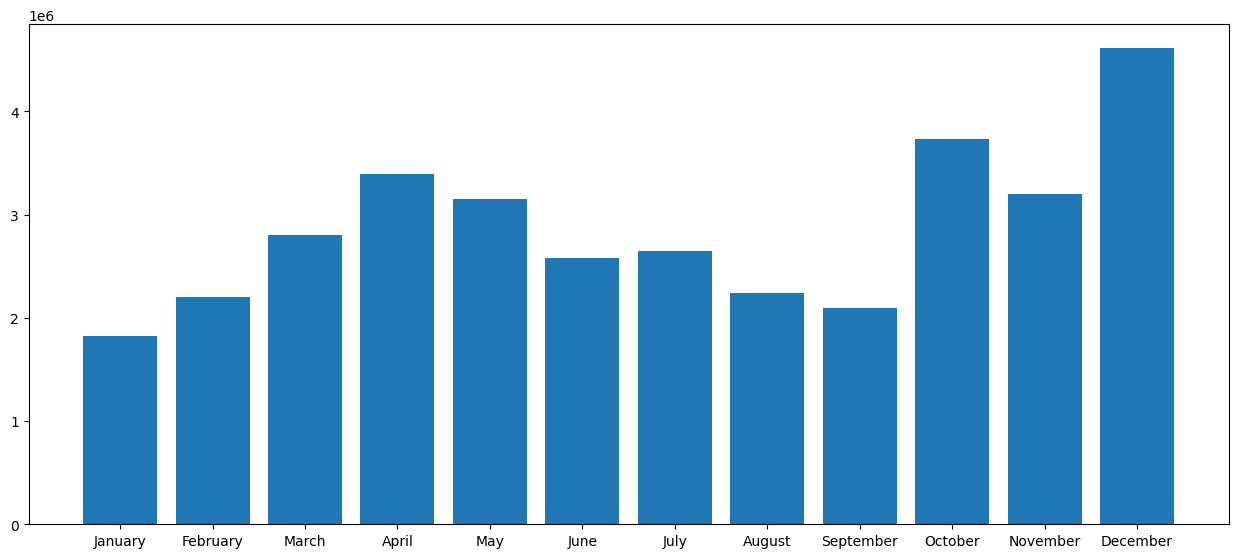

In [19]:
fig = plt.figure(figsize=(15,10))

axes = fig.add_axes([0.5,0.5,0.8,0.5])

axes.bar(month1,monthly_sales['Sales']) #in x = monthly_sales.index we can get the month number

# sns.barplot(x=monthly_sales.index,y=monthly_sales['Sales'],data=monthly_sales)
fig.show()


<AxesSubplot:ylabel='Sales'>

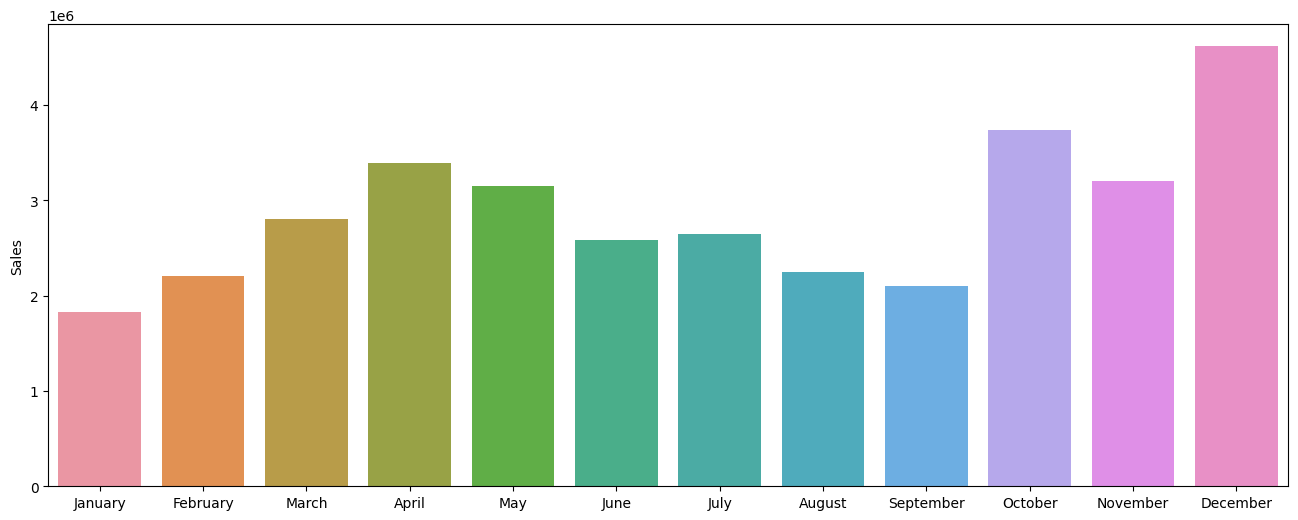

In [21]:
fig = plt.figure(figsize=(16,6))

months = [month for month in range(1,13)]

#converting to month numbers to names
month_names = [datetime.date(2023, monthinteger, 1).strftime('%B') for monthinteger in months]

sns.barplot(x=month_names,y=monthly_sales['Sales'],data=monthly_sales)

So this has been clear from above chart the December (12) has the highest sales among the year may be due to the Christmus celebrations along with new year

where the January has the lowest sales of the Year 

Also we can see the Sales has been Increesing from January to the Apri and again it went down until the October

In [22]:
# Now 2nd Question

#Which city has the maximum sale ?

sales_in_city = yearly_data.groupby('City').sum()
sales_in_city

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


<bound method Figure.tight_layout of <Figure size 1600x600 with 1 Axes>>

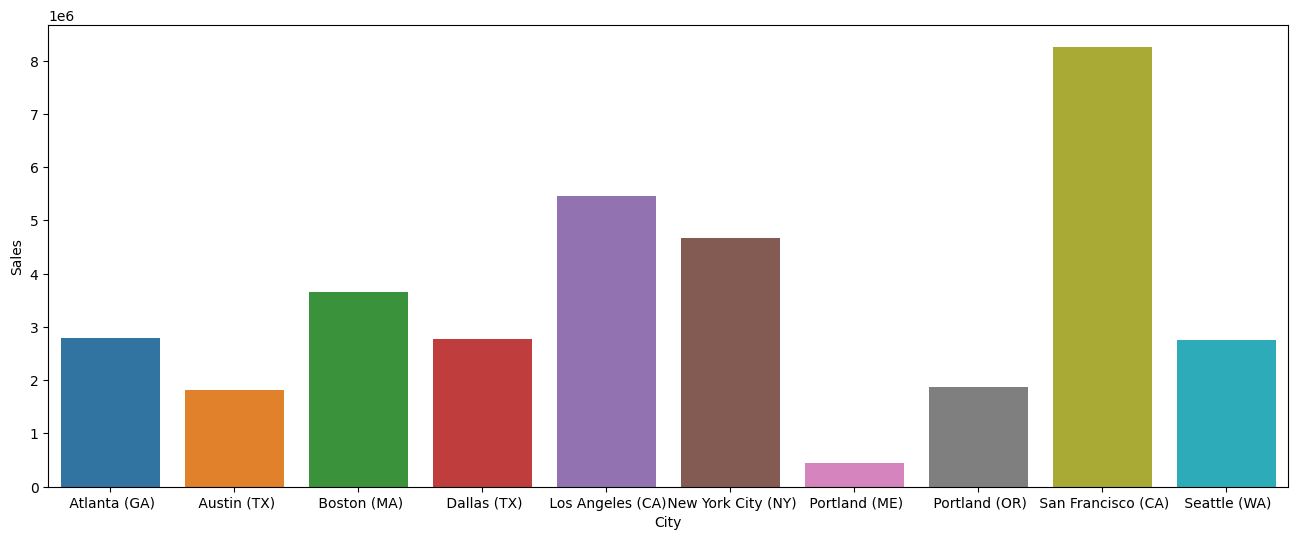

In [23]:
fig = plt.figure(figsize=(16,6))
sns.barplot(x=sales_in_city.index, y=sales_in_city['Sales'])

fig.tight_layout

# Which city has the maximum sale ?

Wow San Francisco was much higher than everyone else where the Portland las the lowest Sales

Not sure yet why the San Francisco has too much Sales, will see further the reason

# What time should we display advertisements to maximize likelihood of customer's buying products?

In [23]:
# Take the time from order date and see what time sell more 

yearly_data['Order Date'] = pd.to_datetime(yearly_data['Order Date'])

In [24]:
yearly_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
 7   Sales             185950 non-null  float64       
 8   City              185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 14.2+ MB


In [25]:
yearly_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [26]:
yearly_data['Hour'] = yearly_data['Order Date'].dt.hour
yearly_data['Minute'] = yearly_data['Order Date'].dt.minute
# It is easy to grab the Hour and Minute from the datetime library
yearly_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [48]:
hourly_data = yearly_data.groupby(['Hour']).count()
hourly_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


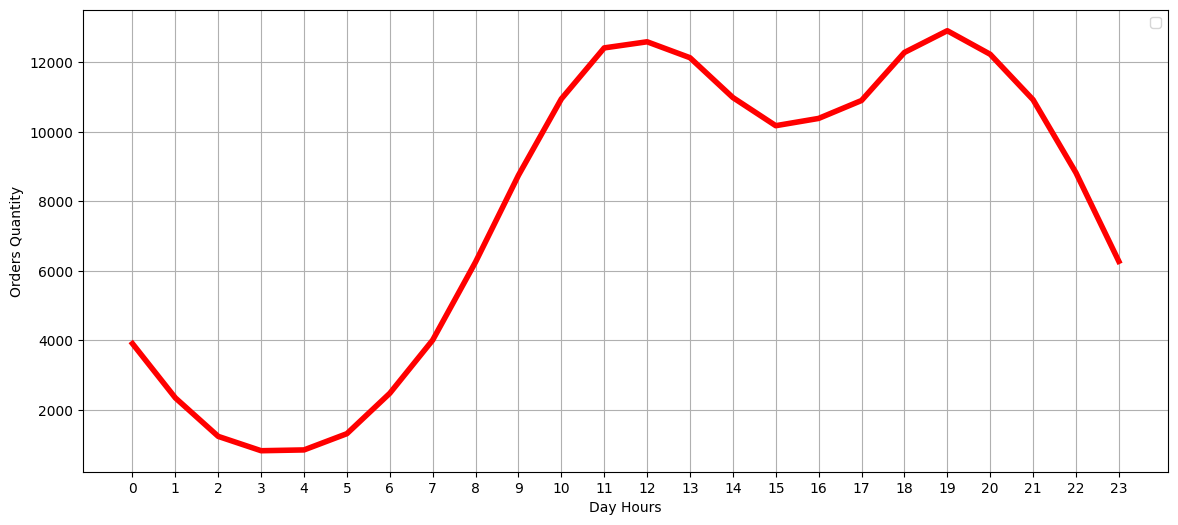

In [72]:
plt.figure(figsize=(14,6))

plt.plot(hourly_data.index,hourly_data['Quantity Ordered'],'r',linewidth='4')

plt.xticks(hourly_data.index)
plt.xlabel('Day Hours')
plt.ylabel('Orders Quantity')
plt.grid(True)
plt.legend()

# Hours for shopping advertisment

so it is clear from above and below similar chart the peoples are sopping a lot during the 10-12 hour and after 18-20Hours. It also looks meaning full the generally people are free from ther morning works around 10 AM and perople came back to home after there office works around 18 hour , 

so the best time for advertise we have to do it before 11 am and the before the 18 hour

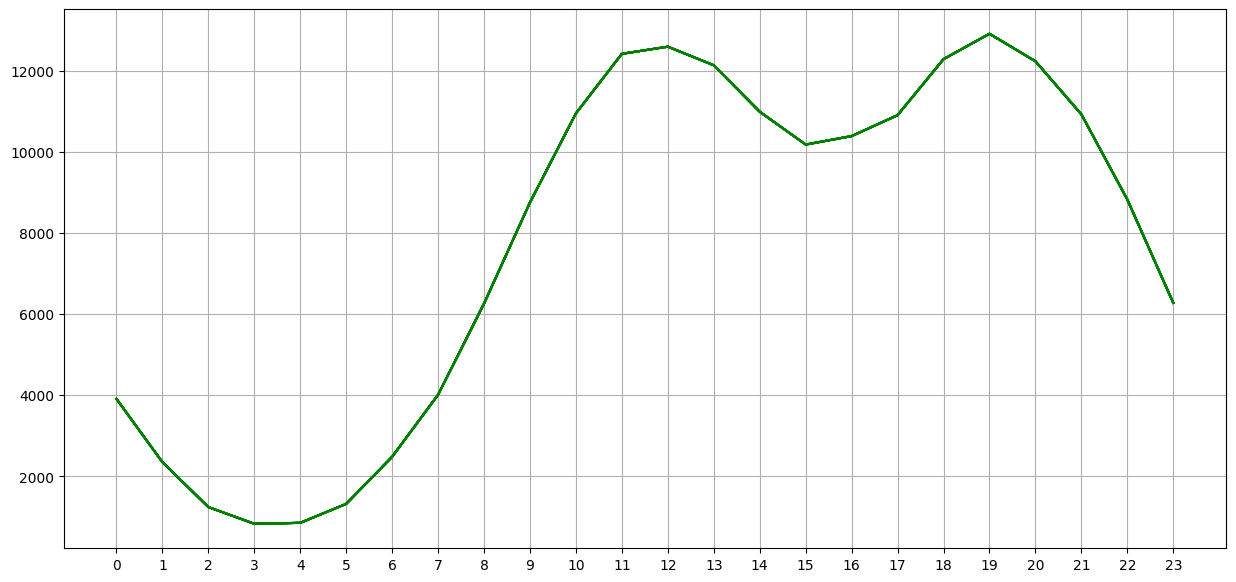

In [78]:
plt.figure(figsize=(15,7))

my_hours=[hour for hour, df in yearly_data.groupby('Hour')]

plt.plot(my_hours,yearly_data.groupby('Hour').count(),'green')
plt.xticks(my_hours)
plt.grid(True)


In [80]:
# hour = [hour for hour, df in yearly_data.groupby('Hour')]
# hour1 = list(yearly_data['Hour'].unique())
# hour1.sort()
# hour1

# hrs=range(1,25)

# hour_new=list(hrs)

# hour_new

# can you check what product are sale together ? i mean often sold

In [94]:
#we can check the order id if there are duplicate i mean shopping multiple iteam on same order id
duplicate_orders = yearly_data[yearly_data['Order ID'].duplicated(keep=False)]

duplicate_orders['Group'] = duplicate_orders.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

duplicate_orders.head(10)

# duplicated_orders = yearly_data[yearly_data['Order ID'].duplicated(keep=False)]
# #keep false=keep all ocurances of the duplicates
# duplicated_orders['Grouped'] = duplicated_orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Group
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco (CA),17,0,"AAA Batteries (4-pack),Google Phone"
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco (CA),17,0,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City (NY),11,7,"Lightning Charging Cable,USB-C Charging Cable"
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City (NY),11,7,"Lightning Charging Cable,USB-C Charging Cable"


The orders have been repeted due to the "Google Phone,Wired Headphones","Lightning Charging Cable,USB-C Charging Cable" for the same order id, so we have to drop this duplicate order id and keep only one


In [96]:
duplicate_orders = duplicate_orders[['Order ID', 'Group']].drop_duplicates()
duplicate_orders.head()

,Order ID,Group
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [99]:
#God Bless StackOverflow

from itertools import combinations
from collections import Counter

count_2items = Counter()
count_3items = Counter()

for row in duplicate_orders['Group']:
    row_list = row.split(',')
    count_2items.update(Counter(combinations(row_list, 2)))
    count_3items.update(Counter(combinations(row_list, 3)))

# print(count_2items)
for key, value in count_2items.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [100]:
# print(count_3items)
for key, value in count_3items.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


Look like the Iphone and 'Lightning Charging Cable' are purchassed frequently and together and on other side The Google Phone and 'USB-C Charging Cable'are most sold iteam

# Lets find the most sold product ?


c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

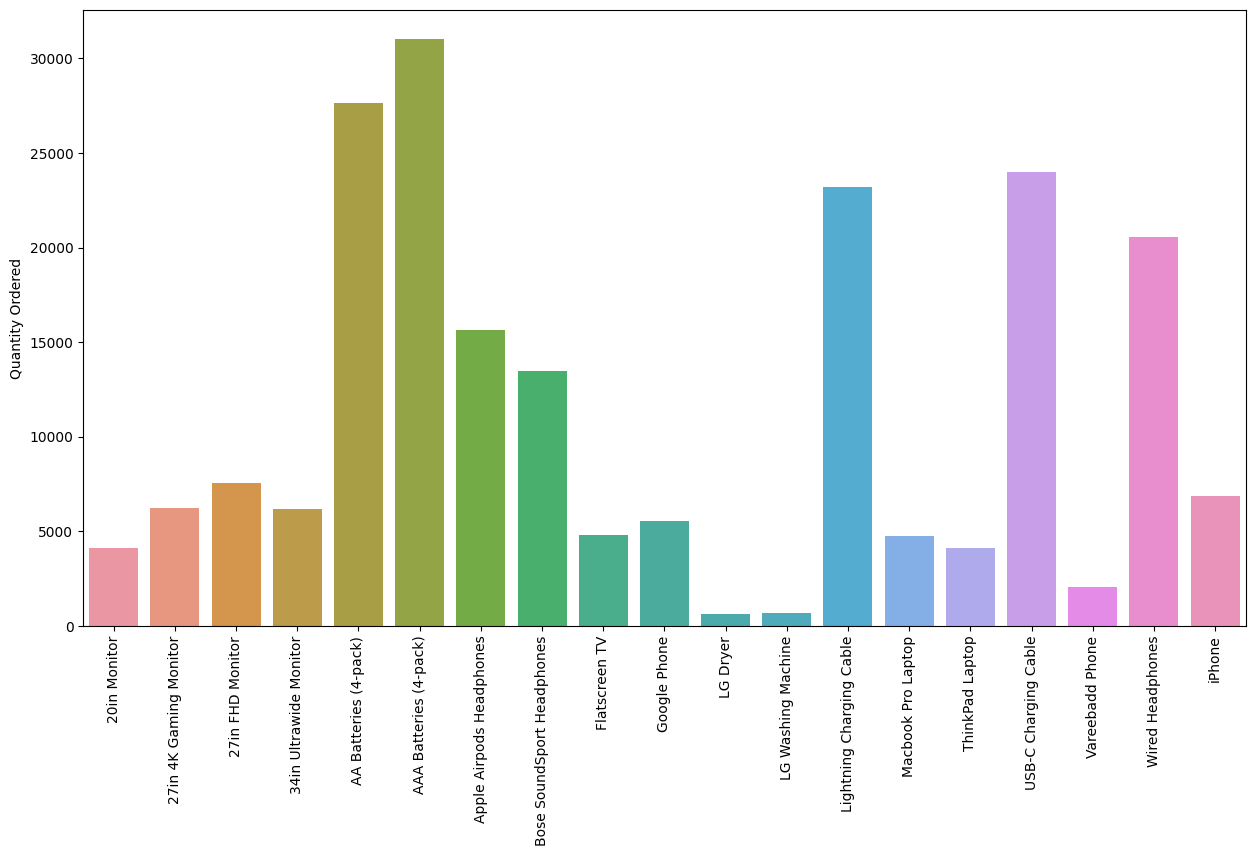

In [135]:
product_sale = yearly_data.groupby('Product')
quantity_ofdered = product_sale.sum()['Quantity Ordered']
product_sale.sum()
iteams = [iteam for iteam, df in product_sale]

plt.figure(figsize=(15,8))

ax = sns.barplot(iteams,quantity_ofdered)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


# msot sold product 

so we can see the most sold product in above and below charts are "AAA Batteries" and "AA Batteries" and 'USB-C Charging Cable' where the LG Dryer has the lowest sale orders

In [155]:
final = yearly_data.groupby('Product').sum().sort_values('Quantity Ordered',ascending=False)

#final.head(10)

[Text(0, 0, 'AAA Batteries (4-pack)'),
 Text(1, 0, 'AA Batteries (4-pack)'),
 Text(2, 0, 'USB-C Charging Cable'),
 Text(3, 0, 'Lightning Charging Cable'),
 Text(4, 0, 'Wired Headphones'),
 Text(5, 0, 'Apple Airpods Headphones'),
 Text(6, 0, 'Bose SoundSport Headphones'),
 Text(7, 0, '27in FHD Monitor'),
 Text(8, 0, 'iPhone'),
 Text(9, 0, '27in 4K Gaming Monitor'),
 Text(10, 0, '34in Ultrawide Monitor'),
 Text(11, 0, 'Google Phone'),
 Text(12, 0, 'Flatscreen TV'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, '20in Monitor'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'LG Washing Machine'),
 Text(18, 0, 'LG Dryer')]

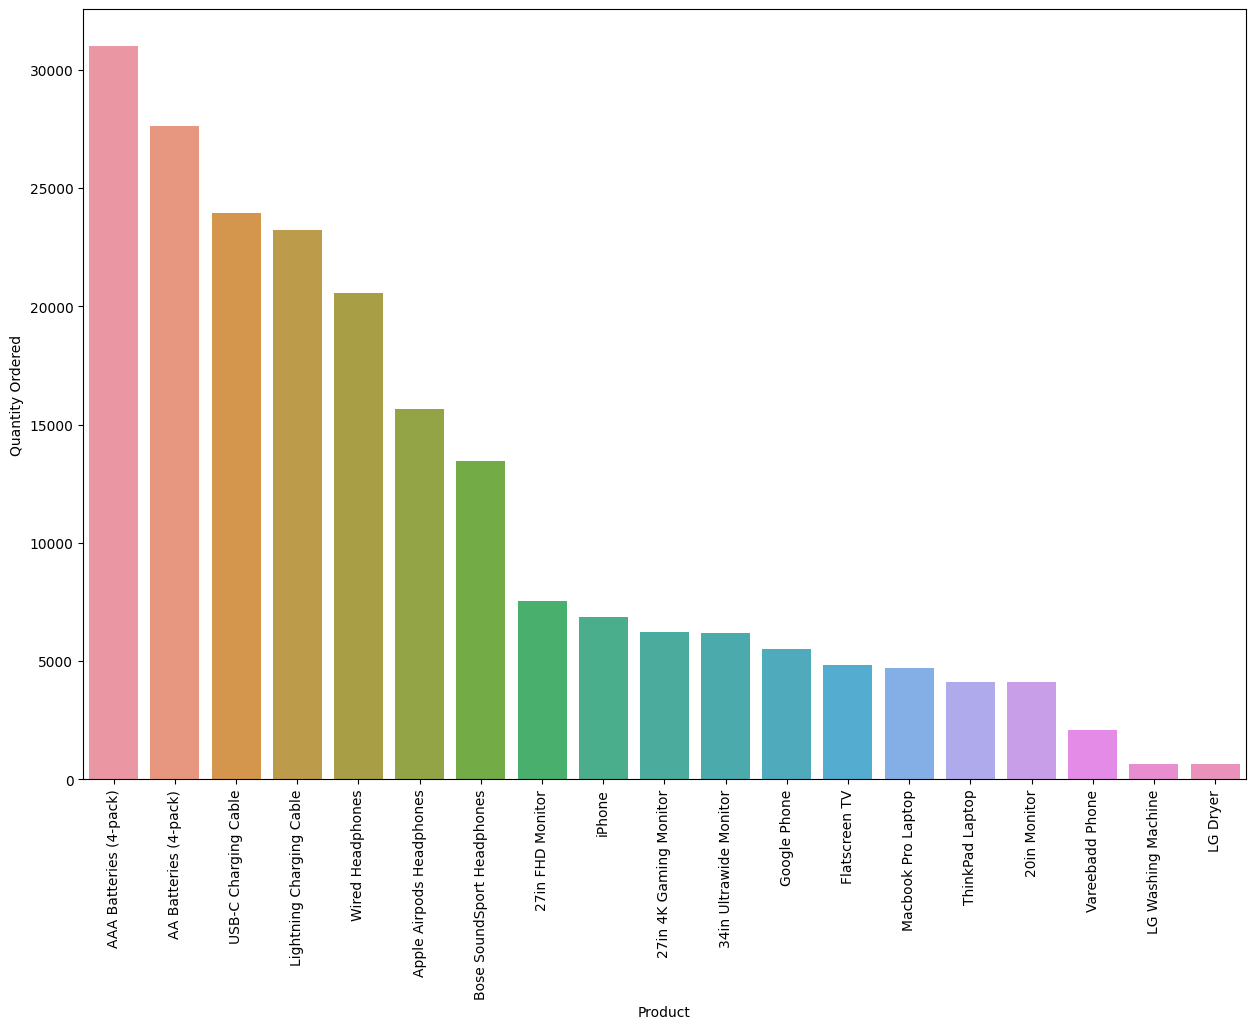

In [154]:
plt.figure(figsize=(15,10))

ax = sns.barplot(x=final.index,y=final['Quantity Ordered'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [157]:
yearly_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30


In [158]:
prices = yearly_data.groupby('Product').mean()['Price Each']

C:\Users\Ravi Nadageri\AppData\Local\Temp\ipykernel_27020\3058511930.py:17: UserWarning:

FixedFormatter should only be used together with FixedLocator



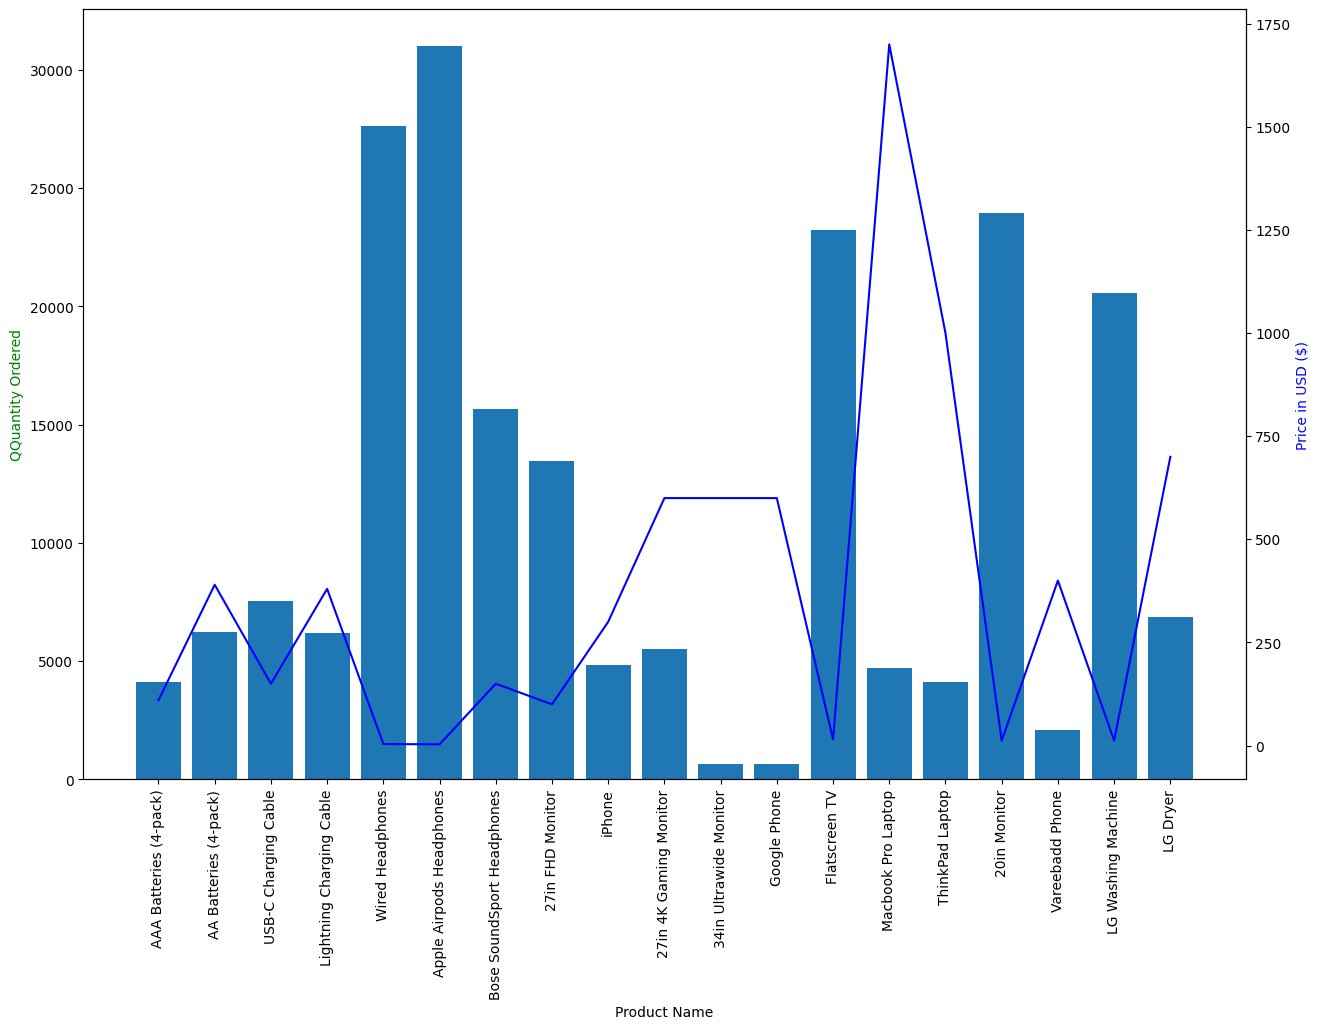

In [188]:
prices = yearly_data.groupby('Product').mean()['Price Each']

# plt.figure(figsize=(15,10))
fig, ax1 = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(15)

ax2 = ax1.twinx()
ax1.bar(iteams,quantity_ofdered)
ax2.plot(iteams, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('QQuantity Ordered', color='g')
ax2.set_ylabel('Price in USD ($)', color='b')
#ax1.set_xticklabels(iteams, rotation='vertical', size=8, fontsize=14)
ax1.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

So this is waht the reson of LG Dryer has less sold, i mean this iteam is quite expensive where the AAA and AA Baterries are cheap in price so those are ordered lots

# We accept our hypothesis that the less expensive those sold in high quentity